In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("Used_Bikes.csv")
data.head()
# # cleaning of data [bike_name	price	city	kms_driven	owner	age	power	brand]
data = data.dropna()

data = data.drop_duplicates()

In [4]:
## data devide into numerical and categorical
numerical = data.select_dtypes(include=[np.number])
categorical = data.select_dtypes(include="O")

In [5]:
## features selection
categorical= categorical.drop(["bike_name","city"],axis=1)

In [6]:
categorical["owner"].value_counts()
# pd.get_dummies(categorical).astype(int)
df = {
    "First Owner" :1,
    "Second Owner":2,
    "Third Owner":3,
    "Fourth Owner Or More":4
}
categorical["owner"]=categorical["owner"].map(df)

In [7]:
numerical.head()

,price,kms_driven,age,power
0,35000.0,17654.0,3.0,110.0
1,119900.0,11000.0,4.0,350.0
2,600000.0,110.0,8.0,675.0
3,65000.0,16329.0,4.0,180.0
4,80000.0,10000.0,3.0,150.0


In [8]:
categorical.head()

,owner,brand
0,1,TVS
1,1,Royal Enfield
2,1,Triumph
3,1,TVS
4,1,Yamaha


In [9]:
brand_dict = {i:key for key,i in enumerate(list(categorical["brand"].unique()))}

In [10]:
categorical["brand"] = categorical["brand"].map(brand_dict)

In [11]:
final_data = pd.concat([numerical,categorical],axis=1)

In [12]:
final_data

,price,kms_driven,age,power,owner,brand
0,35000.0,17654.0,3.0,110.0,1,0
1,119900.0,11000.0,4.0,350.0,1,1
2,600000.0,110.0,8.0,675.0,1,2
3,65000.0,16329.0,4.0,180.0,1,0
4,80000.0,10000.0,3.0,150.0,1,3
...,...,...,...,...,...,...
9362,25000.0,48587.0,8.0,150.0,1,5
9369,35000.0,60000.0,9.0,220.0,1,6
9370,450000.0,3430.0,4.0,750.0,1,14
9371,139000.0,21300.0,4.0,400.0,1,6


In [13]:
## regression
metrix = final_data.corr()
metrix

,price,kms_driven,age,power,owner,brand
price,1.000000,-0.199951,-0.248752,0.807641,-0.005188,0.288409
kms_driven,-0.199951,1.000000,0.367518,-0.168295,0.062612,-0.036161
age,-0.248752,0.367518,1.000000,-0.164211,0.203151,-0.030263
power,0.807641,-0.168295,-0.164211,1.000000,0.043746,0.068647
owner,-0.005188,0.062612,0.203151,0.043746,1.000000,0.005844
brand,0.288409,-0.036161,-0.030263,0.068647,0.005844,1.000000


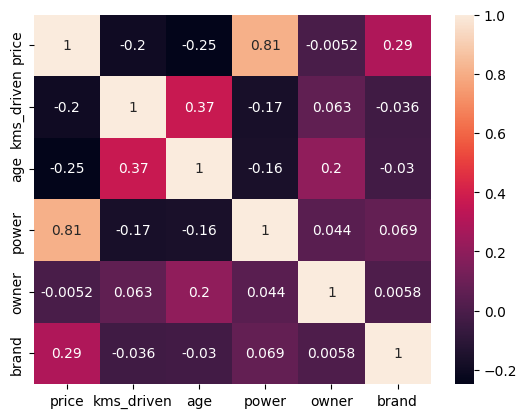

In [14]:
sns.heatmap(metrix,annot=True)
plt.show()

In [15]:
y = final_data["price"]
x = final_data.drop("price",axis=1)

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
random_state=42

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [18]:
model.score(x_test,y_test)

0.7156565060004585

In [19]:
y_pred = model.predict(x_test)
y_pred

array([214096.75462202,  15688.05507288,  15808.8370947 , ...,
        32871.5390032 ,  86178.25863317, 116033.33801615], shape=(1465,))

In [20]:
df1 = pd.DataFrame({"Actual":y_test,"Predicted":y_pred})
df1

,Actual,Predicted
8021,150000.0,214096.754622
1585,39900.0,15688.055073
8922,15000.0,15808.837095
3255,140000.0,136676.387668
6016,115000.0,106628.735465
...,...,...
3988,31500.0,16147.014412
3956,30000.0,20285.312283
5419,21000.0,32871.539003
522,129000.0,86178.258633


Text(0.5, 1.0, 'Actual vs Predicted Price')

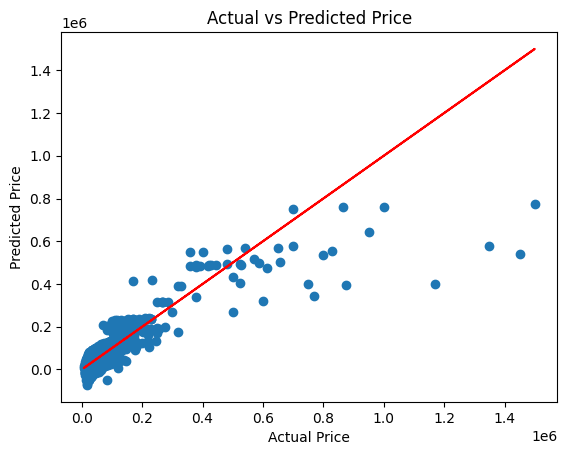

In [21]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.plot(y_test,y_test,color="red")
plt.title("Actual vs Predicted Price")

In [22]:
## to save the model 
import joblib,pickle
joblib.dump(model,"bike_prediction_model.lb")

['bike_prediction_model.lb']